In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("/Users/jie/Documents/shopify/ebike/E-Bike_cleaned.xls",index=False)
df_part1=df[['Date', 'Age','Gender','Health','Education','Family_Income','Employment',
              'Region','Travel_distance','Commute Time','Transportation','Response']]

#########################################
###########Data description##############
df_part1.head()
df_part1.describe(include=['O'])

,Age,Gender,Health,Education,Family_Income,Employment,Region,Travel_distance,Commute Time,Transportation
count,2234,2221,2227,2220,2178,2223,2237,2237,2237,2238
unique,5,4,6,7,6,6,7,5,6,5
top,35 to 49,Male,Very good,University,$100K+,Employee,Toronto,5 - 10 km,16 - 29 minutes,Bike
freq,863,1554,891,903,831,1410,2145,847,782,785


### What is the distribution of categorical features?
* Each row is unique across the dataset (count=unique=2238).
* Age takes 5 ranges with 38.6% at "35 to 49 years old" (top=35 to 49, freq= 863/count=2234).
* Gender variable has 4 possible values, with 70% male, 29.6% female and 0.13% transgender.
* Health variable has 6 values, with 40% Very good (top=Very good, freq=891/count=2227).
* Yearly Household Income takes 6 possible values. 100K+ earned by most family (top=100K+)
* Employment has 6 status, mostly are employees (freq=1410/count=2178).
* Region has 7 values with 95.9% live in Toronto (freq=2145/count=2237).
* Travel distance takes 5 ranges with 37.9% travel 5 to 10 km most days of the week (freq= 847/count=2237).
* Commute time has 6 ranges with 34.9% spending 16-29 mins one-way (freq=782/count=2237).
* Transportation takes 5 values, and 35.1% by bikes (freq=785/count=2237).

### Analyze by pivoting features

In [99]:
# Table of Response vs. Age
response_Age = pd.crosstab(df_part1["Age"],df_part1["Response"],margins=True)
response_Age

response_Age/response_Age.ix["All"]
# response_Age.columns = ["0","1","rowtotal"]
# response_Age.index= ["17 or younger","18 to 34",'35 to 49','50 to 64',"65 years or more","coltotal"]

# #response_Age/response_Age.ix["coltotal"]
# response_Age.div(response_Age["rowtotal"],axis=0)
df_part1[["Age", "Response"]].groupby(['Age']).mean().sort_values(by='Response', ascending=False)


,Response
Age,
17 or younger,1.000000
65 years or more,0.990991
18 to 34,0.982256
35 to 49,0.971031
50 to 64,0.965443


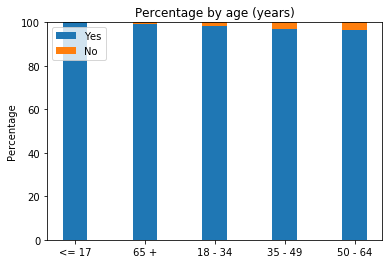

In [100]:
# Plot of Response vs. Gender
%matplotlib inline

N = 5
yesMeans = (100,99.1,98.2,97.1,96.5)
noMeans = (0,0.9,1.8,2.9,3.5)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by age (years)')
plt.xticks(ind, ('<= 17','65 +','18 - 34','35 - 49','50 - 64'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('age.png')


In [ ]:
# Table of Response vs. Gender
response_Gender = pd.crosstab(df_part1["Gender"],df_part1["Response"],margins=True)
response_Gender/response_Gender.ix["All"]
df_part1[["Gender", "Response"]].groupby(['Gender']).mean().sort_values(by='Response', ascending=False)


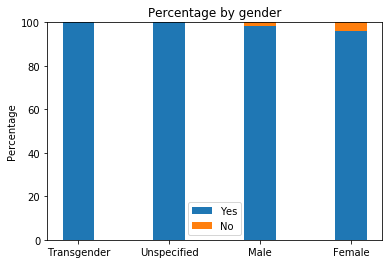

In [101]:
# Plot of Response vs. Gender
N = 4
yesMeans = (100,100,98.2,95.9)
noMeans = (0,0,1.8,4.1)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by gender')
plt.xticks(ind, ('Transgender','Unspecified','Male','Female'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('gender.png')

In [ ]:
# Table of Response vs. Health
response_Health = pd.crosstab(df_part1["Health"],df_part1["Response"],margins=True)
response_Health/response_Health.ix["All"]
df_part1[["Health", "Response"]].groupby(['Health']).mean().sort_values(by='Response', ascending=False)


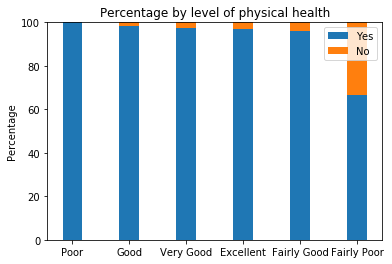

In [102]:
# Plot of Response vs. Health
N = 6
yesMeans = (100,98.5,97.3,96.8,96.2,66.7)
noMeans = (0,1.5,2.7,3.2,3.8,33.3)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by level of physical health')
plt.xticks(ind, ('Poor','Good','Very Good','Excellent','Fairly Good','Fairly Poor'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('health.png')

In [ ]:
# Table of Response vs. Education
response_Education = pd.crosstab(df_part1["Education"],df_part1["Response"],margins=True)
response_Education
response_Education/response_Education.ix["All"]
df_part1[["Education", "Response"]].groupby(['Education']).mean().sort_values(by='Response', ascending=False)

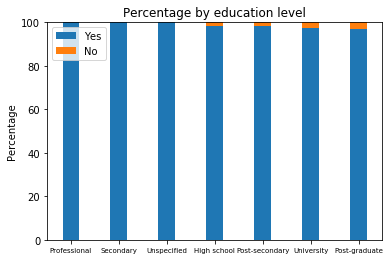

In [103]:
# Plot of Response vs. Education
N = 7
yesMeans = (100,100,100,98.4,98.1,97.3,96.8)
noMeans = (0,0,0,1.6,1.9,2.7,3.2)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by education level')
plt.xticks(ind, ('Professional', 'Secondary', 'Unspecified', 'High school', 'Post-secondary','University','Post-graduate'),
          fontsize=7)
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('education.png')

In [ ]:
# Table of Response vs. Family_Income
response_Income = pd.crosstab(df_part1["Family_Income"],df_part1["Response"],margins=True)
response_Income/response_Income.ix["All"]
df_part1[["Family_Income", "Response"]].groupby(['Family_Income']).mean().sort_values(by='Response', ascending=False)


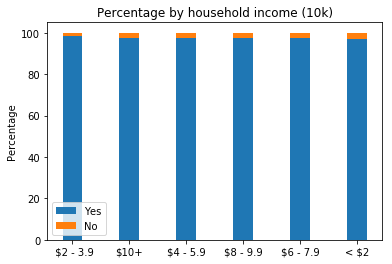

In [104]:
# Plot of Response vs. Family income
N = 6
yesMeans = (98.3,97.6,97.3,97.3,97.3,97.2)
noMeans = (1.7,2.4,2.7,2.7,2.7,2.8)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by household income (10k)')
plt.xticks(ind, (' $2 - 3.9', '$10+', '$4 - 5.9', '$8 - 9.9', '$6 - 7.9','< $2'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('income.png')


In [ ]:
# Table of Response vs. Employment
response_Employment = pd.crosstab(df_part1["Employment"],df_part1["Response"],margins=True)
response_Employment/response_Employment.ix["All"]
df_part1[["Employment", "Response"]].groupby(['Employment']).mean().sort_values(by='Response', ascending=False)


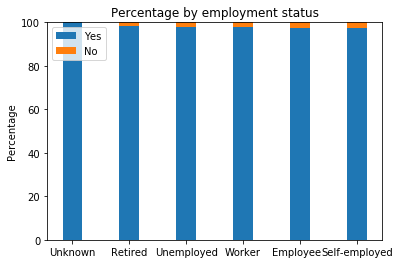

In [105]:
# Plot of Response vs. Employment
N = 6
yesMeans = (100,98.5,97.8,97.7,97.4,97.2)
noMeans = (0,1.5,2.2,2.3,2.6,2.8)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by employment status')
plt.xticks(ind, ('Unknown', 'Retired', 'Unemployed', 'Worker', 'Employee  ','Self-employed'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('employment.png')


In [ ]:
# Table of Response vs. Region
response_Region = pd.crosstab(df_part1["Region"],df_part1["Response"],margins=True)
response_Region/response_Region.ix["All"]
df_part1[["Region", "Response"]].groupby(['Region']).mean().sort_values(by='Response', ascending=False)


In [ ]:
# Table of Response vs. Travel_distance
response_distance = pd.crosstab(df_part1["Travel_distance"],df_part1["Response"],margins=True)
response_distance/response_distance.ix["All"]
df_part1[["Travel_distance", "Response"]].groupby(['Travel_distance']).mean().sort_values(by='Response', ascending=False)


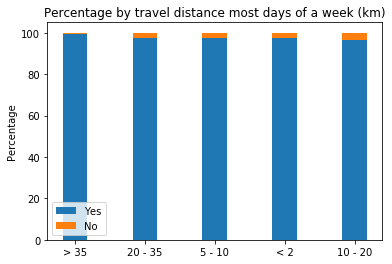

In [106]:
# Plot of Response vs. Travel_distance
N = 5
yesMeans = (99.3,97.6,97.5,97.4,96.6)
noMeans = (0.7,2.4,2.5,2.6,3.4)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by travel distance most days of a week (km)')
plt.xticks(ind, ('> 35', '20 - 35', '5 - 10', '< 2', '10 - 20'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('distance.png')

In [ ]:
# Table of Response vs. Commute time
response_commute = pd.crosstab(df_part1["Commute Time"],df_part1["Response"],margins=True)
response_commute/response_commute.ix["All"]
df_part1[["Commute Time", "Response"]].groupby(['Commute Time']).mean().sort_values(by='Response', ascending=False)


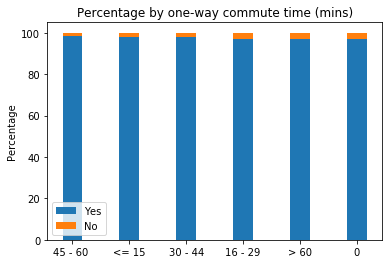

In [107]:
# Plot of Response vs. Commute time
N = 6
yesMeans = (98.4, 97.9, 97.7, 97.0, 97.0,97.0)
noMeans = (1.6,2.1,2.3,3,3,3)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by one-way commute time (mins)')
plt.xticks(ind, ('45 - 60 ', '<= 15', '30 - 44', '16 - 29', '> 60',
                '0'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('commute.png')

In [ ]:
# Table of Response vs. Transportation
response_Transportation = pd.crosstab(df_part1["Transportation"],df_part1["Response"],margins=True)
response_Transportation/response_Transportation.ix["All"]

df_part1[["Transportation", "Response"]].groupby(['Transportation']).mean().sort_values(by='Response', ascending=False)


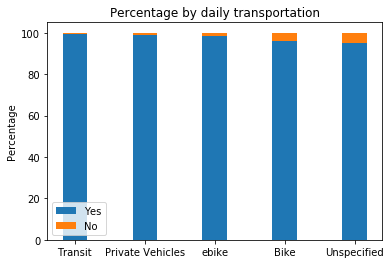

In [108]:
# Plot of Response vs. Transportation
N = 5
yesMeans = (99.2, 99.0, 98.5, 96.0, 95.0)
noMeans = (0.8, 1, 1.5, 4, 5)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yesMeans, width)
p2 = plt.bar(ind, noMeans, width,bottom=yesMeans)

plt.ylabel('Percentage')
plt.title('Percentage by daily transportation')
plt.xticks(ind, ('Transit', 'Private Vehicles', 'ebike', 'Bike', 'Unspecified'))
plt.yticks(np.arange(0, 110, 20))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.savefig('transportation.png')

In [ ]:
#divide the dataset into train set and test set, by using the "K-fold" cross-validation



#create dummy variable "Response" by the answer of question 
#"Does your household have access to any of the following types of private motorized vehicles?"
keyword1 = ['yes','car','cars','motorcycle','atv','motor','truck']
keyword2 = ['share','rental','sharing','zip','Car2Go','Cars2Go',"borrow","rent",'carshare']
pat1 = '|'.join(keyword1)
pat2 = '|'.join(keyword2)

df['Response'] = pd.np.where(df['Vehicles'].str.lower().str.contains(pat1), 1, 0)
df['Response'] [df['Vehicles'].str.lower().str.contains(pat2)]=0

#Check the one-way frequency table of "Response"
my_tab = pd.crosstab(index=df['Health'],columns="count") 
my_tab

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation

df2 = pd.get_dummies(df, columns =['Age','Sex','Health','Education','Family_Income','Employment',
              'Address','Travel_distance'])
df2.head(5)
#logreg=LogisticRegression()
#X, y = df["Age"], df["Response"]


#predicted = cross_validation.cross_val_predict(logreg, df["Age"], df["Response"], cv=10)
#metrics.accuracy_score(y, predicted)



In [ ]:
print metrics.classification_report(y, predicted) 

I have renamed most of the columns for simplify data manipluations. Check reference [1] for details.

## Check missing value pattern

In [ ]:
import missingno as msno
%matplotlib inline

In [ ]:
msno.matrix(df)

At a glance, address and all multiple choice questions regarding with the e-bike use appear to be completed, while the personal information (e.g. household income, education, gender and employment) seems spottier. 


In [ ]:
#Check the randomness of missing value
pd.crosstab(df["Age"].fillna('missing'),df["Family_Income"].fillna('missing'),dropna=False, margins=True)
pd.crosstab(df["Education"].fillna('missing'),df["Family_Income"].fillna('missing'),dropna=False, margins=True)


In [ ]:
msno.heatmap(df)

It seems that survey which is filed with an average travel distance most days of the week is definitely having a complete address; and along with the average commute time variable, travel distance and address will also be provided.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

## Suggestions for next survey
1.Age should be treated as continuous variable \
2.Transportation might be biased. Since most of them answered winter ttc and summer bike. hard to define.



#### Reference
##### [1] Table Names

| # |Original Names |   New Column Names   |
| :- |:---:| :-|
| 1|Timestamp | Date|
| 2|1. What age range do you fall in? | Age|
| 3|Sex | Gender|
| 4|How would you describe your level of physical health? | Health|
| 5|What level of education have you reached? | Education|
| 6|What is your household income? | Family_income|
| 7|Which category best describes your employment? | Employment|
| 8|What Toronto district is your primary address located in? | Address|
| 9|On average, what distance do you travel most days of the week? | Travel_distance|
| 10|On average, how long is your commute? (each way) | Commute|
| 11|Which transportation option do you end up using most often? | Transportation|
| 12|Does your household have access to any of the following types of private motorized vehicles? | Vehicles|
| 13|Do you support any of the following statements? | Support_Statements|
| 14|When you use Toronto's Multi-Use Trails do you mostly | Multiuse_Trail|
| 15|Are you aware that the City of Toronto's Multi-Use Paths have a speed limit of 20 km/h? | Trail_speed|
| 16|Have you witnessed a collision or conflict on a trail between | Collision_witness|
| 17|Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit? | Speed_limit|
| 18|Currently, any kind of e-bike may use a multi-use path if they are propelled by pedaling only.  If any e-biker or other type of vehicle is being propelled by motor power, then it is considered a motor vehicle, and may be fined. | multiuselane_propelled|
| 19|When you use Toronto's bicycle lanes do you mostly | bicyclelane_use|
| 20|Currently, any kind of e-bike may use a bicycle lane, provided they are propelled by pedalling only.  If any e-bike is being propelled by motor power, then it is considered a motor vehicle and may be fined.  | bikelane_propelled|
| 21|Sidewalks are for pedestrians.  Cyclists and e-bikers should not ride or drive on sidewalks.  With regards to illegal use of bicycles and e-bikes on sidewalks, should the City. | Sidewalk|
| 22|Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians.  Historically, there has been little risk as electric wheelchairs available for purchase have only traveled at speeds which are close to walking speed.  More recently, personal mobility devices which resemble e-bikes and may travel at more than triple walking speed have become available.  In your opinion, should the City; | Personal_mobile|
<style>
table {float:left}
</style>